# Overview 

Please see the [homework policy](https://fa20.fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. 

> "Machine intelligence is the last invention that humanity will ever need to make."
>
> -- Nick Bostrom

## Grading

The rubric TAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Data Shapeshifter                                      | 10  |
| Architecting Infrastructure                            | 15  |
| Deriving Network Equations                             | 20  |
| Implementing the Network                               | 45  |
| It's Alive!                                            | 10  |
| Cruisin' Keras                                         | 20  |
| Total                                                  | 120 |

## Objectives 

The objectives behind this homework assignment are as follows:

- Implement functions in Python;
- Constructing neural networks; and
- Establishing sequential layers with Keras.

In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

print(f"python: {sys.version}")
print(f"pandas: {np.__version__}")
print(f"tensorflow: {tf.__version__}")
# Detect if a GPU is present
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  print(f"GPU Enabled: True")
else:
  print(f"GPU Enabled: False")

try:
  from google.colab import drive
  from google.colab import files
  is_google_colab = True

  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


python: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
pandas: 1.18.5
tensorflow: 2.3.0
GPU Enabled: False
Notebook is on Google CoLab


In [ ]:
# Mounting the device will require following instructions to enter a
if is_google_colab:
  drive.mount('/content/drive')
else:
  print("Please make sure to upload images to Compass2g.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Assignment - Homework 4
STAT 430 - FDL, Fall 2020

Due: **Thursday, Oct 29th, 2020 at 6:00 PM**

- **Author:** Jared(Mengchen) Qiu
- **NetID:** mqiu3

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


## [10 Points] Exercise 1: Reshaping Data

**Have questions on Exercise 2? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/68>**

Reshaping data is a common requirement for working with neural networks. Previously, the assumption about data in neural networks
was that there is exactly _one_ example or image. In practice, there needs to
be a large amount of data for the neural network to function. Previously, $X$ was defined to be a single input vector: 

$$
X_{m \times 1} = \begin{bmatrix}
\vert \\
X^{(1)}  \\
\vert  \\
\end{bmatrix}_{m \times 1}
$$

To enable multiple training examples, let's define $X$ to be:

$$
X_{m \times n_e} = \begin{bmatrix}
\vert & \vert & \vert \\
X^{(1)} & X^{(2)} & X^{(3)} \\
\vert & \vert & \vert \\
\end{bmatrix}_{m \times n_e}
$$

where $m$ is the number of inputs and $n_e$ is the number of observations. Therefore, the linear combinations in $Z^{[1]}$ would now look like:

$$
Z^{[1]} = \begin{bmatrix}
\vert & \vert & \vert \\
Z^{[1](1)} & Z^{[1](2)} & Z^{[1](3)} \\
\vert & \vert & \vert \\
\end{bmatrix}_{n_h \times n_e}
$$

Let the parentheses -- $[]$ -- denote the layer number and the square brackets
-- $()$ -- be the training data example.

### [5 points] (a) Reshaping Data Input

Having said this, please reshape the MNIST training data from:

$$\text{Examples }\times \text{Height } \times \text{Width }$$

To being shaped as:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m} \times \underbrace{\text{Examples }}_{=n_e}$$

where $m$ is the number of features and $n_e$ represents the number of observations.


Through this process, the data is being flattened:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m}$$

Therefore, we will have $m$ different pixels acting as features for the model.

_Hints:_

- Changing a data's shape is possible with [`np.reshape(data, (data.shape[0], -1))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape) and [`np.reshape(data, (-1, data.shape[0]))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape).
  - **Note:** `-1` denotes an unknown dimension and requests that NumPy determine it during the reshape. 
- Arrays can be transposed with [`data.T`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html)



In [ ]:
#@title (Hidden) Initialization of Data
%%capture
%tensorflow_version 2.x
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Perform scaling
x_train, x_test = x_train / 255.0, x_test / 255.0 # [0, 255] -> [0, 1]

In [ ]:
import numpy as np

# code here 
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T
# data should be reshaped

# Grading helper:
print(f'X has dimensions: {x_train.shape}')
print(f'X has dimensions: {x_test.shape}')

X has dimensions: (784, 60000)
X has dimensions: (784, 10000)


In [ ]:
x_test.shape

(10000, 784)

#### Aside: Data reshaping 

Having trouble re-organizing the data? Try modifying a smaller example case first. **This is not graded but is intended to allow exploration of how data changes in a minimal example.**

In [ ]:
# Not graded code, acts a small test case
import numpy as np
a = np.arange(24).reshape((4, 3, 2))
print(f"Contents of `a` before transform:\n {a}\n")
print(f"Dimensions of `a` before transform:\n {a.shape}\n")

# This is just is a direct implementation of the hint. 
a2 = np.reshape(a, (-1, a.shape[0]))
print(f"Contents of `a2` after transform:\n {a2}\n")
print(f"Dimensions of `a2`:\n {a2.shape}\n")

# Use this line of code for reshaping x 
a3 = np.reshape(a, (a.shape[0], -1)).T
print(f"Contents of `a3` after transform:\n {a3}\n")
print(f"Dimensions of `a3`:\n {a3.shape}\n")

b = np.arange(3)
print(f"Contents of `b`:\n {b}\n")
print(f"Dimensions of `b`:\n {b.shape}\n")

Contents of `a` before transform:
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]

Dimensions of `a` before transform:
 (4, 3, 2)

Contents of `a2` after transform:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

Dimensions of `a2`:
 (6, 4)

Contents of `a3` after transform:
 [[ 0  6 12 18]
 [ 1  7 13 19]
 [ 2  8 14 20]
 [ 3  9 15 21]
 [ 4 10 16 22]
 [ 5 11 17 23]]

Dimensions of `a3`:
 (6, 4)

Contents of `b`:
 [0 1 2]

Dimensions of `b`:
 (3,)



###  [5 Points] (b) Encoding Output

Encode the label data ($Y$) using one-hot encoding. 

The data has the following labels:

| Label|Class       |
|-----:|:-----------|
|     0|T-shirt/top |
|     1|Trouser     |
|     2|Pullover    |
|     3|Dress       |
|     4|Coat        |
|     5|Sandal      |
|     6|Shirt       |
|     7|Sneaker     |
|     8|Bag         |
|     9|Ankle boot  |


_Hint:_ 

- Have you read over the **Encoding** lecture?



In [ ]:
# Code here
#y_train = (pd.get_dummies(y_train)).to_numpy()
#y_test = (pd.get_dummies(y_test)).to_numpy()
# Note: We want y_hat to be [n_c x n_e]
# not [n_e x n_c]

y_train_onehot = y_train[:,np.newaxis]
y_test_onehot = y_test[:,np.newaxis]
y_train_onehot = pd.get_dummies(y_train[:,np.newaxis].reshape(-1)).T.to_numpy()
y_test_onehot = pd.get_dummies(y_test[:,np.newaxis].reshape(-1)).T.to_numpy()


In [ ]:
# Grading helper
print(f'Y has dimensions: {y_train.shape}')
print(f'Y Train has dimensions: {y_train_onehot.shape}')
print(f'Number of Images: {y_train_onehot.shape[1]}')

Y has dimensions: (60000,)
Y Train has dimensions: (10, 60000)
Number of Images: 60000


Test case notes:

- `y_train` should have dimensions: (10, 60000)
- `Number of Images` should be: 60000.


## [15 Points] Exericse 2: Architecting Infrastructure

**Have questions on Exercise 2? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/69>**

Within this part, we'll construct general functions that can be used across neural networks. 

### [5 points] (a) He initialization

Create a function to initialize weight parameters for a given layer in the neural network. The weight initialization should use [He's initialization](https://arxiv.org/abs/1502.01852) given by:

$$
\begin{align*}
W_{n^{[l]} \times n^{[l-1]}} &\sim N(0, 1) \\
W &:= W\sqrt{\frac{2}{n^{[l-1]}}}
\end{align*}
$$

where $N(0,1)$ is the standard normal distribution, $n^{[l-1]}$ denotes the number of input weights, and $n^{[l]}$ is the
number of output weights.

Implementation Guidelines:

- **Arguments:**
    - `n_in`: Number of input weights
    - `n_out`: Number of output weights
- **Return:**
    - `W` a matrix of dimension $n^{[l]} \times n^{[l-1]}$

_Hints:_ NumPy has a built in way of generating random data with [`np.random.randn(n, p)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

---



In [ ]:
# Code Here
def ini(n_in, n_out):
  to_ret = np.random.randn(n_out, n_in)
  to_ret = to_ret*np.sqrt(2/n_in)
  return to_ret

In [ ]:
# Run test case
np.random.seed(112)
# Should have initialization of:
# he_initialization(4, 3)
ini(4, 3)
# array([[ 1.04491348, -0.93050742,  0.41260625,  0.34339403],
#       [ 0.24151303,  0.41856918, -0.49456097, -0.19109271],
#       [-0.35860733,  0.7416791 ,  0.90066355, -0.38414521]])


array([[ 1.04491348, -0.93050742,  0.41260625,  0.34339403],
       [ 0.24151303,  0.41856918, -0.49456097, -0.19109271],
       [-0.35860733,  0.7416791 ,  0.90066355, -0.38414521]])

### [10 points] (b) Activation Functions

Implement the ReLU, Sigmoid, and Softmax activation functions alongside their derivatives.

Implementation Guidelines for each function:

- **Arguments:**
    - `X` a matrix of dimension `a X b`.
- **Return:**
    - Appropriately "activated" or "derivative" matrix of dimension `a X b`


In [ ]:
import numpy as np

def relu(z):
  # Code Here
  a = np.where(z > 0, z, 0)
  return a
  
def relu_prime(z):
  # Code here
  prime = np.where(z >= 0, 1, 0)
  return prime

def sigmoid(z):
  # Code here
  a = 1/(1+np.exp(-z))
  return a

def sigmoid_prime(z):
  # Code here
  prime = sigmoid(z) * (1 - sigmoid(z))
  return prime

def softmax(z):
  # Code here
  a = np.exp(z) / np.sum(np.exp(z), axis=0)
  return a

def softmax_prime(z):
  # Code here
  s = softmax(z).reshape(-1,1)
  prime = np.diagflat(s) - np.dot(s, s.T)
  #prime = softmax(z)*(1-softmax(z))
  return prime


## [20 points] Exercise 3 - Deriving a Neural Network!

**Have questions on Exercise 3? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/70>**

In this exercise block, we'll create a computational graph and compute the
appropriate backpropagation derivatives.

In the first and second hidden layers, there will be _unknown_ number of neurons. Let the neurons in the first hidden layer be denoted as $n_j^{(1)}$. Within the second hidden layer and output layer, let there be $n_c^{(2)}$ neurons. The input layer and first hidden layers should include a bias term to make the counts respectively $m + 1$ and $n_j^{(1)} + 1$.  For the non-linear activation functions, let the first hidden layer use 
$g^{(1)} (x) = \mathrm{ReLU}(x)$, the second hidden layer be $g^{(2)} (x) = \sigma(x)$. Finally, in the output layer, apply the $\mathrm{softmax}(x)$ to obtain exactly $n_c^{(2)}$ neurons that correspond to $C$ classes. 

We'll use the categorical cross-entropy cost function of 

$$
J\left(\boldsymbol{W}\right) = -\frac{1}{N} \sum_{i=1}^{N} { \sum_{c=1}^{C} { y_{ic} \log\left({ \hat y_{ic} }\right)  }}
$$

where,

- $\boldsymbol{W}$ represents the weights of the neural network -- including the bias term,
- $N$ represents the number of examples the network is being trained with,
- $y_{ic}$ is the true label in $c \in C$, and;
- $\hat y_{ic}$ is the predicted label probability in $c \in C$.


_Hint:_ 

- Have you read over the **Backprop with Matrices** and the **Softmax Backprop** lectures?




### [10 points] (a) Sketching the computational graph

Sketch the computational graph for the described neural network. For each layer on the graph, write out the forward propagation equations in matrix equation form. 



... insert diagram here ... 

In [ ]:
# Upload an image file 
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# Display the embedded image in the notebook.
Image('colab-logo.png', width=100)

### [10 points] (b) Deriving the backward propagation equations

Within this step, derive the backward propagation equations for the network
by obtaining the necessary partial derivatives.



... insert formulas here ... 

In [ ]:
# Upload an image file 
uploaded = files.upload()

In [ ]:
# Display the embedded image in the notebook.
Image('colab-logo.png', width=100)

## [45 Points] Exercise 4 - Implementing the Network

**Have questions on Exercise 4? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/71>**

Within this part, we'll construct functions associated with _training_ a neural network as described in Exercise (3).

In particular, we'll develop functions for: 

- Performing forward propagation
- Perform backward propagation
- Update network parameters
- Computing the cost function

### [5 points] (a) Parameter Initialization

Using the function in **Exercise 2 (a)** construct a function 
that initializes both the weights and the bias terms for each layer as specified in **Exercise 3**. The bias values should be initialized with 0 and the weights should be initialized with the function developed in **Exercise 2 (a)**.

Implementation Guidelines:

- **Arguments:**
    - `m`: Number of input neurons
    - `n_h`: Number of hidden neurons
    - `n_y`: Number of output neurons
- **Return:**
    - `cache_parameters` with a dictionary data structure that contains:
       - `W^(1)` a matrix of dimension `n_h X m`
       - `b^(1)` a matrix of dimension `n_h X 1`
       - `W^(2)` a matrix of dimension `n_y X n_h`
       - `b^(2)` a matrix of dimension `n_y X 1`

_Hint:_ 

- NumPy has a built in way of generating a zero vector with [`np.zeros((n, p))`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

In [ ]:
# code here
def weight_bias(m, n_h, n_y):
  cache_parameters = {}
  cache_parameters['W^(1)'] = ini(m, n_h)
  cache_parameters['b^(1)'] = np.zeros((n_h, 1))
  cache_parameters['W^(2)'] = ini(n_h, n_y)
  cache_parameters['b^(2)'] = np.zeros((n_y, 1))
  return cache_parameters

### [10 points] (b) Forward propagation

Implement a function that performs the forward propagation
and caches (saves) the value computed at each node on the computational graph. 

Implementation Guidelines:

- **Arguments:**
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` with a dictionary data structure.
- **Return:**
    - `SM` a matrix of dimension `n_y X n_e`
    - `cache_forward` with a dictionary data structure that contains:
       - `Z^{(1)}`
       - `A^{(1)}`
       - `Z^{(2)}`
       - `A^{(2)}`
       - `SM`

_Note:_ $A^{(2)} \rightarrow SM$ to provide the softmax output that gives $\hat y$. 


_Hint:_

- Recall that items in a dictionary data structure can be accessed with `data["item"]`.


In [ ]:
# code here
def forward(X, cache_parameters):
  cache_forward = {}
  cache_forward['Z^{(1)}'] = cache_parameters['W^(1)'] @ X + cache_parameters['b^(1)']
  cache_forward['A^{(1)}'] = relu(cache_forward['Z^{(1)}'])
  cache_forward['Z^{(2)}'] = cache_parameters['W^(2)'] @ cache_forward['A^{(1)}'] + cache_parameters['b^(2)']
  cache_forward['A^{(2)}'] = sigmoid(cache_forward['Z^{(2)}'])
  cache_forward['SM'] = softmax(cache_forward['A^{(2)}'])
  return cache_forward['SM'], cache_forward

**Why is it important to store the values computed in the prediction step?**

... your answer here ... 

... did you write an answer here ??? 

Because we have to use them in backward propagation step.


### [10 Points] (c) Backward propagation

Implement a function that performs the backward propagation
at each node on the computational graph. Please use the back propagation equations derived in **Exericse 3**.

- **Arguments:**
    - `Y` a matrix of dimension `1 X n_e`.
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` a data dictionary.
    - `cache_forward` a data dictionary.
- **Return:**
    - `cache_grad` with a dictionary data structure that contains:
       - `dW2`
       - `db2`
       - `dW1`
       - `db1`

To ensure that the bias terms remain as 1D vectors, please use 

```python
db = np.sum("gradient code here for bias", axis = 1, keepdims = True)
```

In [ ]:
# Code here
def backward(Y, X, cache_parameters, cache_forward):
  cache_grad = {}
  inter = (cache_forward['SM'] -Y) / X.shape[1] * sigmoid_prime(cache_forward['Z^{(2)}'])
  cache_grad['dW2'] = inter @ cache_forward['A^{(1)}'].T
  cache_grad['db2'] = np.sum(inter*1, axis=1, keepdims=True)
  cache_grad['dW1'] = ((cache_parameters['W^(2)'].T @ inter) * relu_prime(cache_forward['Z^{(1)}'])) @ X.T
  cache_grad['db1'] = np.sum((cache_parameters['W^(2)'].T @ inter) * relu_prime(cache_forward['Z^{(1)}']), axis=1, keepdims=True)
  return cache_grad

### [10 points] (d) Parameter Update

With the backward propagation calculations in hand, the
next step is to update the parameters in the neural network. The update
step should be performed using **Batch Gradient Descent (BGD)**.

- **Arguments:**
    - `alpha` the learning rate parameter.
    - `cache_parameters` a data dictionary containing parameters.
    - `cache_grad` a data dictionary containing the gradients.
- **Return:**
    - `cache_parameters` an updated version of the dictionary data structure that contains:
       - `W2`
       - `b2`
       - `W1`
       - `b1`


In [ ]:
# Code here
def iterator(alpha, cache_parameters, cache_grad):
  W2 = cache_parameters['W^(2)'] - alpha * cache_grad['dW2']
  b2 = cache_parameters['b^(2)'] - alpha * cache_grad['db2']
  W1 = cache_parameters['W^(1)'] - alpha * cache_grad['dW1']
  b1 = cache_parameters['b^(1)'] - alpha * cache_grad['db1']
  cache_parameters['W^(2)'] = W2
  cache_parameters['b^(2)'] = b2
  cache_parameters['W^(1)'] = W1
  cache_parameters['b^(1)'] = b1
  return cache_parameters

### [10 Points] (e) Model Training Wrapper

Create a function that encases all of the prior functions. This function should
perform the training and provide side-effects of the training process. 

- **Arguments:**
    - `Y` a matrix of dimension `n_c X n_e`.
    - `X` a matrix of dimension `m X n_e`.
    - `n_h` number of neurons in the hidden layer.
    - `alpha` the learning rate parameter. Default `1e-3`. 
    - `epochs` the total number of times to train. Default `50`.
- **Side-effect**
    - Every 10 iterations output the iteration number and the present cost.
- **Return:**
    - `cost_history` the cost values from each iteration of the training step.
    - `cache_parameters` with a dictionary data structure that contains:
       - `W2`
       - `b2`
       - `W1`
       - `b1`

In [ ]:
import numpy as np

In [ ]:
# Code Here
def Wrapper(Y, X, n_h, alpha=1e-3, epochs=50):
  cost_history = []
  parameters_ = weight_bias(X.shape[0], n_h, Y.shape[0])
  for i in range(epochs):
    sm, forward_ = forward(X, parameters_)
    #cost = (np.sum(np.sum(Y * np.log(forward_['SM']), axis=0)))/Y.shape[1]*(-1)
    backward_ = backward(Y, X, parameters_, forward_)
    parameters_ = iterator(alpha, parameters_, backward_)
    cache_parameters = parameters_
    cost = np.sum(Y * np.log(sm)) / Y.shape[1]*(-1)
    cost_history.append(cost)
    if i % 10 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
  return cost_history, cache_parameters


## [10 Points] Exericse 5: It's Alive!

**Have questions on Exercise 5? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/72>**

In this exercise, we put everything together from the previous four exercises and train our network from scratch!

### [5 points] (a) Training the Model

In this exercise, perform the full network training on the MNIST Fashion data shaped in **Exercise 1 (a)**. 

Retrieve and visualize the cost function history across **40 epochs** with a learning rate of **0.001**. 

**Note:** Make sure to run the hidden code chunk and the reshaping code you wrote prior to training the code within this cell

In [ ]:
# Code Here

history, para = Wrapper(y_train_onehot, x_train, 64, 0.0001, 40)

Cost after iteration 0: 2.339418
Cost after iteration 10: 2.339203
Cost after iteration 20: 2.338988
Cost after iteration 30: 2.338772


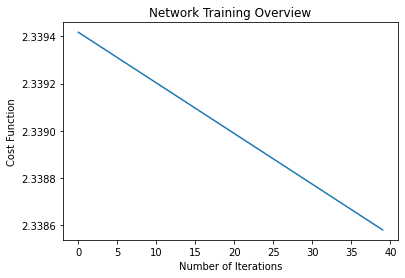

In [ ]:
%matplotlib inline
# Visualization code
import matplotlib.pyplot as plt
# Must have variable named as `cost_history` with 1 dimension.
plt.plot(history)
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.title('Network Training Overview')
plt.show()

### [5 points] (b) Predicting the Model

Use the model parameters obtained from training the network in **(i)** to make predictions on the data. Consider creating a prediction function to aide in this
task.

- **Arguments:**
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` a dictionary data structure that contains estimated parameters.
- **Return:**
    - `prediction` predicted values

_Hint:_ Logic for this was rewritten during the forward propagation step. 


In [ ]:
# Code Here
def predd(X, cache_parameters):
  a = cache_parameters['W^(1)'] @ X + cache_parameters['b^(1)']
  b = relu(a)
  c = cache_parameters['W^(2)'] @ b + cache_parameters['b^(2)']
  d = sigmoid(c)
  predictn = softmax(d)
  return predictn

prediction = predd(x_train, para)

The following should be used to show the image alongside of its predicted
class.

Note: 

- [`np.argmax(data)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) returns the index of the highest value.
- [`np.max(data)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.max.html) returns the highest value.

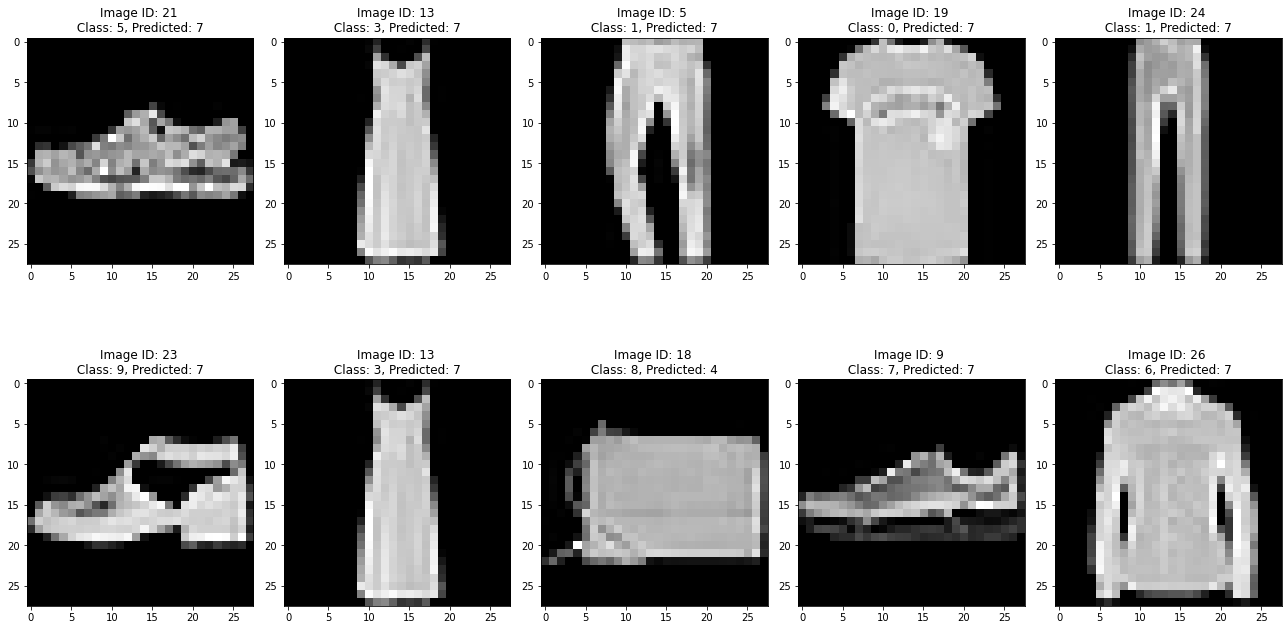

In [ ]:
%matplotlib inline
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist_viz = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train_viz, y_train_viz), (x_test_viz, y_test_viz) = fashion_mnist_viz.load_data()
# Perform scaling
x_train_viz, x_test_viz = x_train_viz / 255.0, x_test_viz / 255.0

# Set seed for reproducibility
################################################
# Change to the last four digits of your UIN
#
################################################
np.random.seed(2707)

# Obtain a set of indices to obtain predictions
idx = list(np.random.randint(x_test_viz.shape[1], size = 10))

# Increase the figure size
plt.subplots(figsize=(18, 10))

# Iterate through 10 training examples
for i in range(10):
  obs = idx[i]                           # Retrieve the index
  plt.subplot(2, 5, i+1)                 # Create a subplot
  img = x_test_viz[obs].reshape((28,28)) # Examples x Width x Height
  pred = np.argmax(prediction[:, obs])   # Obtain the highest index
  plt.imshow(img, cmap='gray')           # Plot gray scale
  plt.title(f'Image ID: {obs} \n Class: {y_test_viz[obs]}, Predicted: {pred} ')

plt.tight_layout()

## [20 points] Exercise 6 - Cruisin' Keras!

**Have questions on Exercise 6? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/73>**

In this exercise block, we'll implement the same neural network from **Exercise 3 - 5** but using Keras. Hopefully, the results are similar to what was computed in **Exercise 5**! (Fingers crossed 🤞)


### (a) (10 points) Structuring a model in keras

Structure a two-layer sequential model in Keras that mirrors the guidelines in **Exercise 3**. 

_Hint:_ 

- Have you read over the **Keras in Practice** lecture?


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential, layers

# code Here
model1 = Sequential([
      layers.Input(shape=(784,)),
      layers.Dense(64, activation='relu'), # or embed
      layers.Dense(64, activation='sigmoid'),
      layers.Dense(10, activation='softmax')
  ])

Show the model layer information by providing a model summary with Keras.

In [ ]:
# code here
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### (b) (10 points) Model Training

Train the neural network within Keras. Training should be done in a similar 
manner to **Exercise 5 (a)** using a `batch_size` equivalent to the size of the data set under `categorical_crossentropy` loss. Unlike before, please construct a graph that shows training and test behavior. This information is available on
the `model.fit` call. 

Make sure the call to `.fit()` includes `validation_data = (x_test, y_test)` as specified in order to access `val_loss`. 


In [ ]:
# code here
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#
#from keras import backend as K
#K.set_value(model.optimizer.learning_rate, 0.5)
model1_ = model1.fit(x_train.T, y_train_onehot.T, batch_size = 60000, epochs = 5000, validation_data = (x_test.T, y_test_onehot.T))

Epoch 1/5000
1/1 [==============================] - 0s 140ms/step - loss: 2.2931 - accuracy: 0.1517 - val_loss: 2.2893 - val_accuracy: 0.1529
Epoch 2/5000
1/1 [==============================] - 0s 55ms/step - loss: 2.2888 - accuracy: 0.1554 - val_loss: 2.2851 - val_accuracy: 0.1562
Epoch 3/5000
1/1 [==============================] - 0s 50ms/step - loss: 2.2846 - accuracy: 0.1596 - val_loss: 2.2810 - val_accuracy: 0.1608
Epoch 4/5000
1/1 [==============================] - 0s 47ms/step - loss: 2.2805 - accuracy: 0.1635 - val_loss: 2.2770 - val_accuracy: 0.1650
Epoch 5/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.2765 - accuracy: 0.1675 - val_loss: 2.2731 - val_accuracy: 0.1694
Epoch 6/5000
1/1 [==============================] - 0s 50ms/step - loss: 2.2726 - accuracy: 0.1718 - val_loss: 2.2692 - val_accuracy: 0.1732
Epoch 7/5000
1/1 [==============================] - 0s 48ms/step - loss: 2.2688 - accuracy: 0.1755 - val_loss: 2.2655 - val_accuracy: 0.1778
Epoch 8/5000

KeyError: ignored

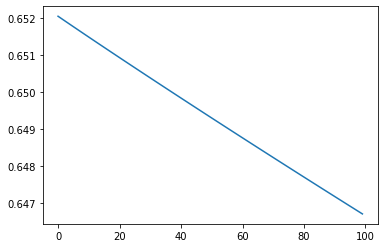

In [ ]:
# Visualization code here... 

import matplotlib.pyplot as plt

my_model_variable = model1# Place the model output variable here

plt.plot(my_model_variable.history['loss'])
plt.plot(my_model_variable.history['val_loss'])
plt.title('Network Training')
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
